The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offer

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] =200
sns.set_style('darkgrid')

In [3]:
# Read data
df = pd.read_excel('EastWestAirlines.xlsx', index_col=0)
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


# Heirarchical clustering

In [15]:
# Feature scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x= sc.fit_transform(df)
x

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

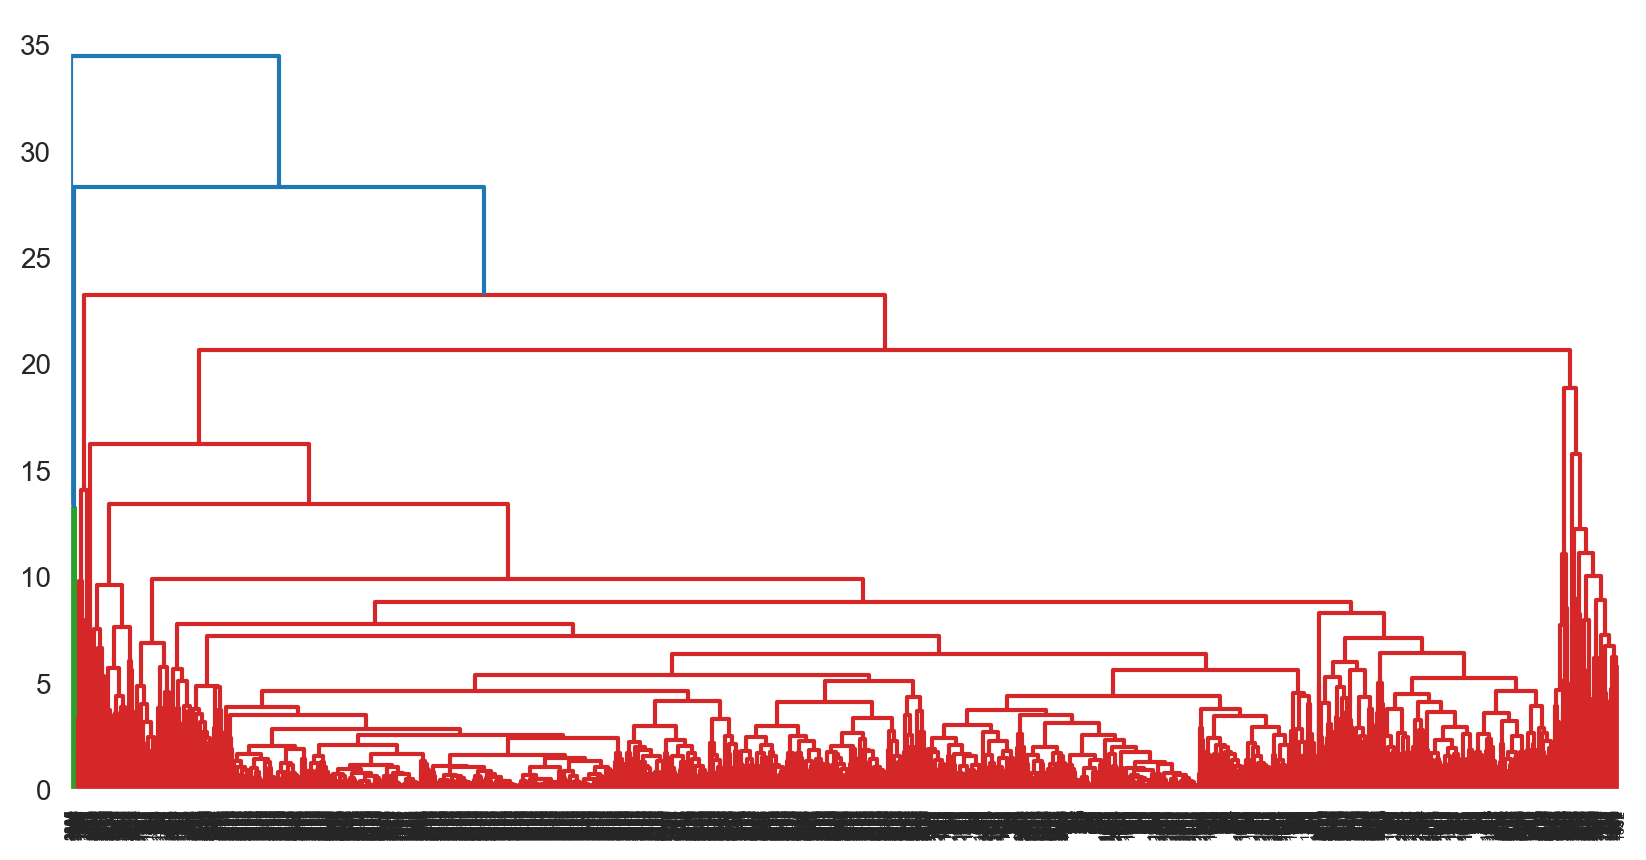

In [16]:
#selecting number of cluster using dendrogram

from scipy.cluster import hierarchy

lk = hierarchy.linkage(x, method='complete')
dendro = hierarchy.dendrogram(lk)

By looking at the dendrogram:
    1)By drawing the line horizontially we get cluster=2 and
    2)Based on colors the number of clusters are 3

In [17]:
#Based on colors the number of clusters are 3.

from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3)
y=hc.fit_predict(x)

In [18]:
y

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [19]:
df['cluster'] = y

In [20]:
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
ID#,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,0
2,19244,0,1,1,1,215,2,0,0,6968,0,0
3,41354,0,1,1,1,4123,4,0,0,7034,0,0
4,14776,0,1,1,1,500,1,0,0,6952,0,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
4018,64385,0,1,1,1,981,5,0,0,1395,1,0
4019,73597,0,3,1,1,25447,8,0,0,1402,1,1


C:\Users\apoor\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Bonus_miles', ylabel='Balance'>

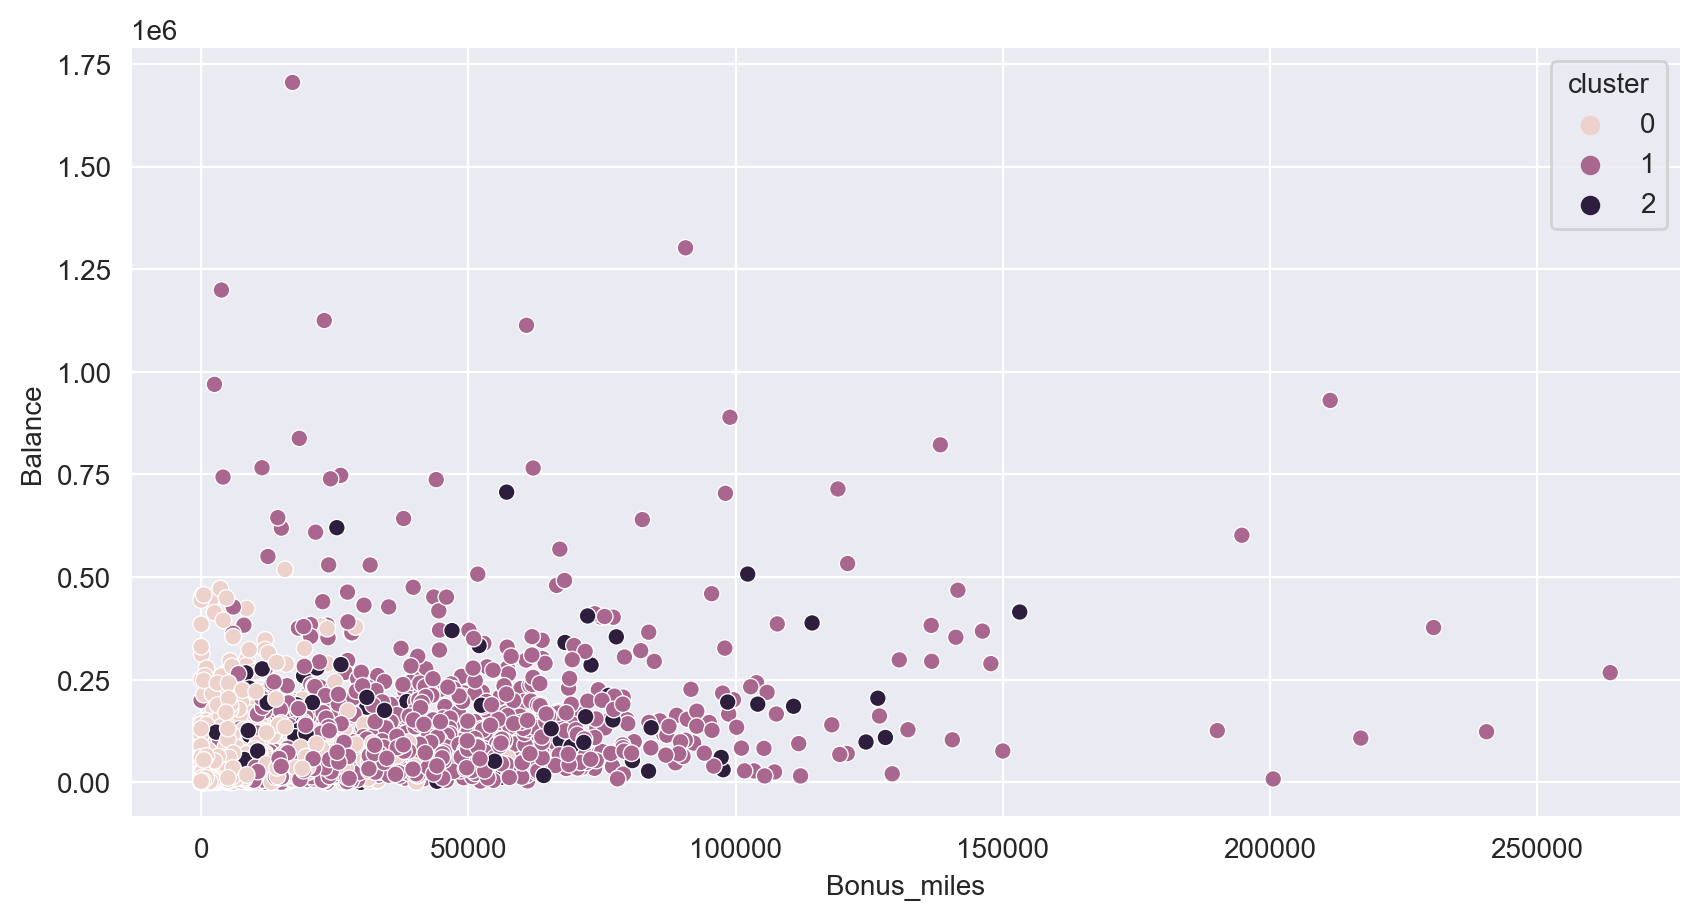

In [21]:
#Plot the scatter plot

sns.scatterplot(df['Bonus_miles'], df['Balance'], hue=df['cluster'])

By looking at above plot we can conclude that custering has not done properly with cluster=3 so by we have to check with clster=2

In [22]:
#By drawing the line horizontially we get cluster=2

hc= AgglomerativeClustering(n_clusters=2)
y = hc.fit_predict(x)
y

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [23]:
df['y'] = y

C:\Users\apoor\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Bonus_miles', ylabel='Balance'>

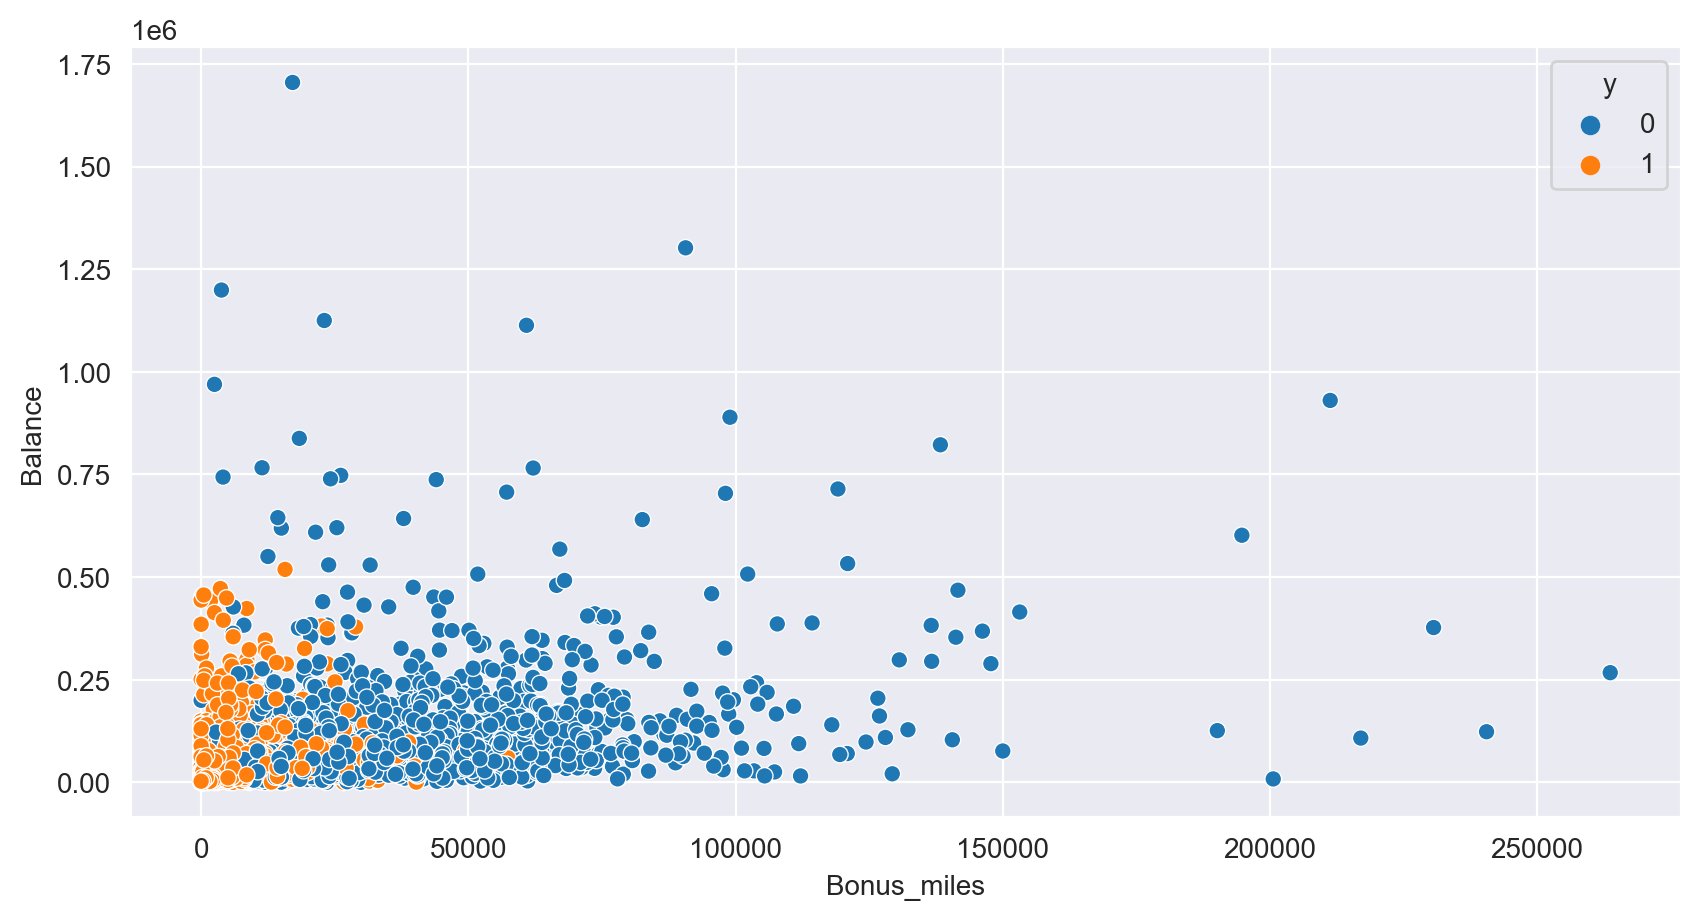

In [24]:
sns.scatterplot(df['Bonus_miles'], df['Balance'], hue=df['y'])

In [25]:
#Validating the model using silhouette score
from sklearn.metrics import silhouette_score

silhouette_score(x,y)

0.28926595242577247

# K-Means 

In [26]:
from sklearn.cluster import KMeans

In [27]:
wcss = []

for i in range(2,20):
    km = KMeans(n_clusters=i)
    km.fit_predict(x)
    wcss.append(km.inertia_)

In [28]:
wcss

[35409.51662986129,
 30899.21640879058,
 27161.460004544857,
 23700.42654893708,
 21470.760963048007,
 18891.969600471213,
 17317.78127303896,
 15960.008293244127,
 14726.983322766791,
 13705.154241345053,
 12946.625460918129,
 12429.167419842453,
 12016.973313840983,
 11455.260737492847,
 11201.802325568344,
 10712.474592861401,
 10541.705819948975,
 10045.951811956178]

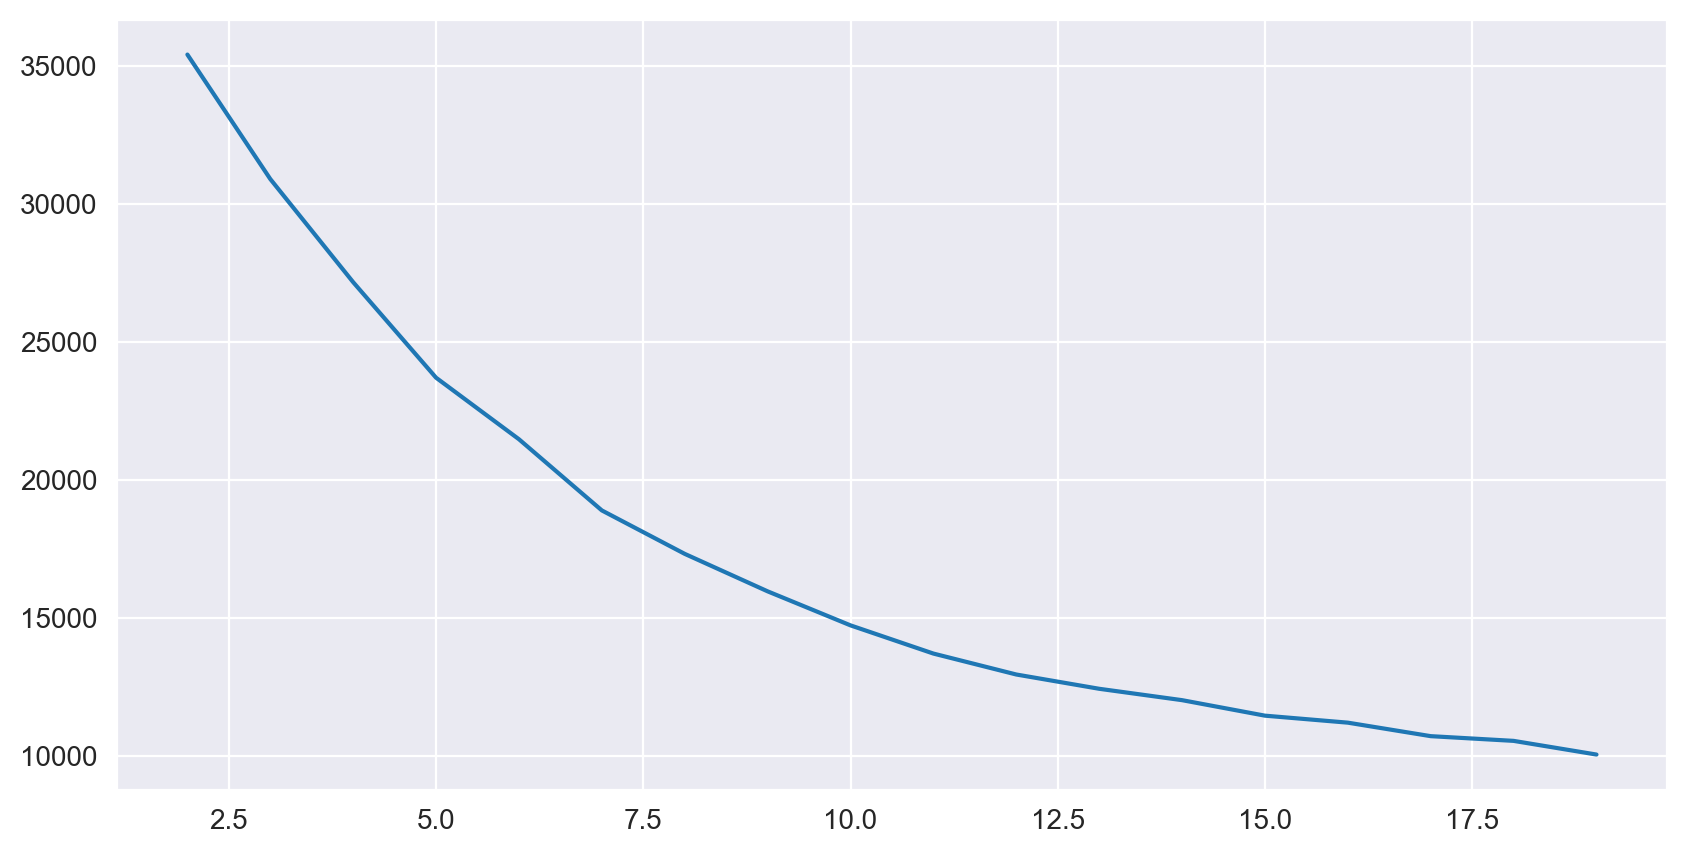

In [29]:
plt.plot(range(2,20),wcss)

From above chart n cluster will be 5

In [30]:
km = KMeans(n_clusters=5)
ypred=km.fit_predict(x)
ypred

array([0, 0, 0, ..., 3, 0, 0])

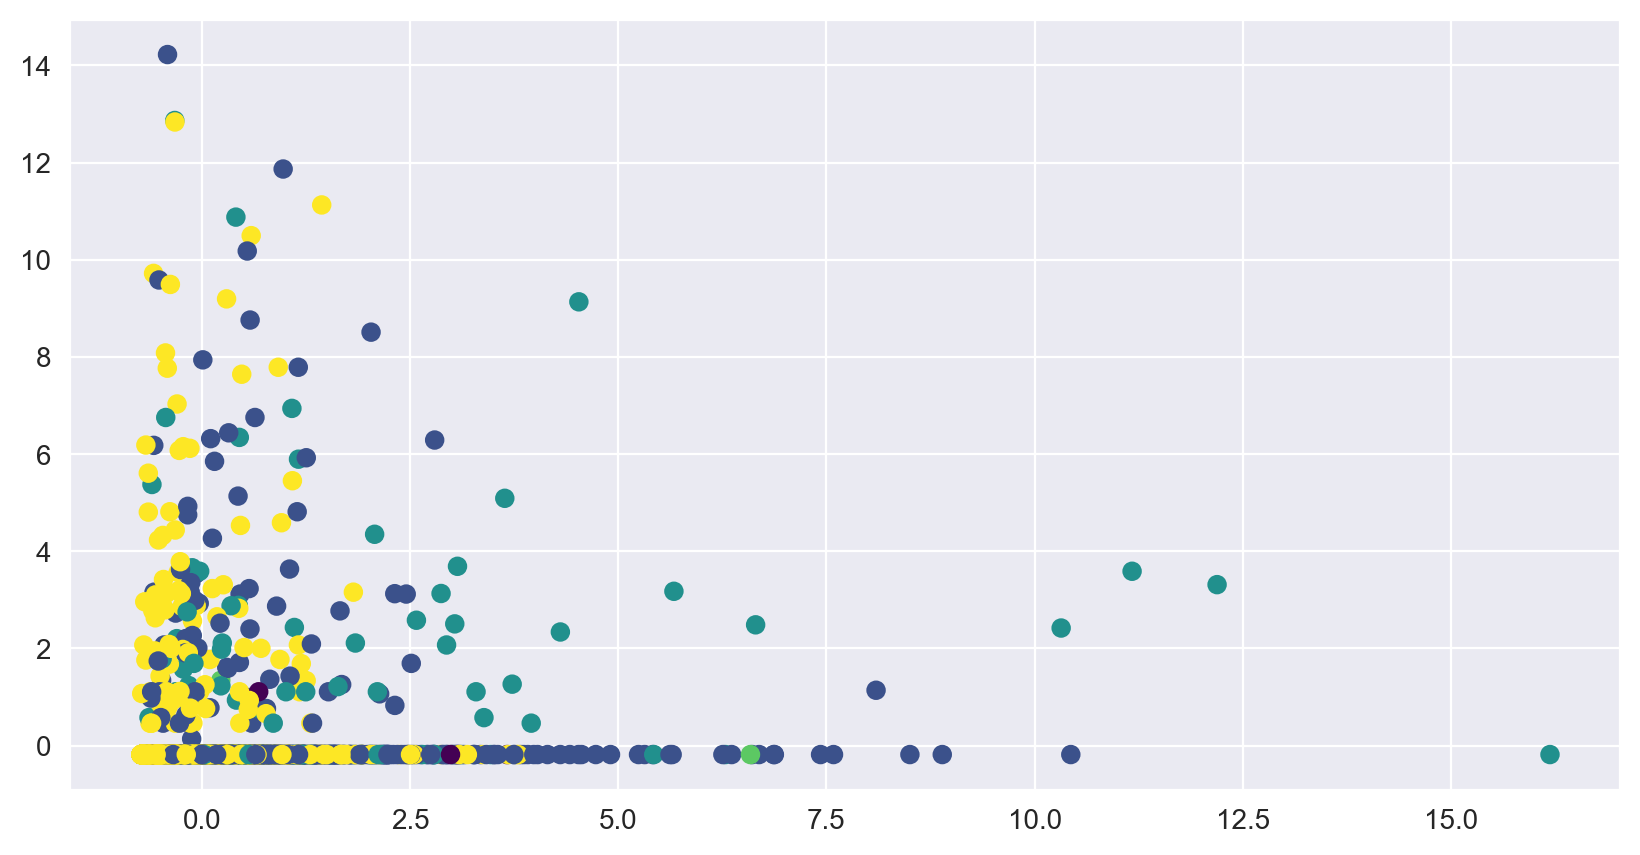

In [31]:
plt.scatter(x[:,0],x[:,1],c = ypred, cmap='viridis_r')

In [32]:
#Validation
silhouette_score(x,ypred)

0.32493461646879984